# 라이브러리 버전 확인

In [60]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.8.2
1.21.6


# 이미지 28x28로 만들기

In [62]:
# 이미지 28x28로 만들기

from PIL import Image
import glob
import os

In [63]:
# 가위 이미지 28x28로 만들기

def resize_images(img_path):
  images=glob.glob(img_path + "/*.jpg")

  print(len(images), " images to be resized.")

  target_size = (28,28)
  for img in images:
    old_img = Image.open(img)
    new_img = old_img.resize(target_size, Image.ANTIALIAS)
    new_img.save(img, "JPEG")

  print(len(images), " images resized")

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_scissor_path = "/content/drive/MyDrive/rock_scissor_paper/scissor"
resize_images(image_dir_scissor_path)

100  images to be resized.
100  images resized


In [64]:
# 주먹과 보 이미지 28x28로 만들기

image_dir_rock_path = "/content/drive/MyDrive/rock_scissor_paper/rock"
image_dir_paper_path = "/content/drive/MyDrive/rock_scissor_paper/papaer"
resize_images(image_dir_rock_path)
resize_images(image_dir_paper_path)

100  images to be resized.
100  images resized
100  images to be resized.
100  images resized


In [65]:
import numpy as np

# 가위바위보 이미지 개수 총합에 주의하세요.
# 가위 : 0, 바위 : 1, 보 : 2

def load_data(img_path, number_of_data=300):
  img_size=28
  color=3

  # 이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.

  imgs=np.zeros(number_of_data*img_size*img_size*color, dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
  labels=np.zeros(number_of_data, dtype = np.int32)

  idx = 0
  for file in glob.iglob(img_path+'/scissor/*jpg'):
    img = np.array(Image.open(file), dtype=np.int32)
    imgs[idx,:,:,:] = img
    labels[idx]=0 # 가위 : 0
    idx = idx + 1
  
  for file in glob.iglob(img_path+'/rock/*jpg'):
    img = np.array(Image.open(file), dtype=np.int32)
    imgs[idx,:,:,:] = img
    labels[idx]=1 # 바위 : 1
    idx = idx + 1

  for file in glob.iglob(img_path+'/paper/*jpg'):
    img = np.array(Image.open(file), dtype=np.int32)
    imgs[idx,:,:,:] = img
    labels[idx]=2 # 보 : 2
    idx = idx + 1

  print("학습데이터(x_train)의 이미지 개수는", idx, "입니다.")
  return imgs, labels

images_dir_path = "/content/drive/MyDrive/rock_scissor_paper"
(x_train, y_train) = load_data(images_dir_path)

# 입력은 0~1 사이의 값으로 정규화
x_train_norm = x_train/255.0
print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 200 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


### 한번 이미지를 불러와볼까?

라벨: 0


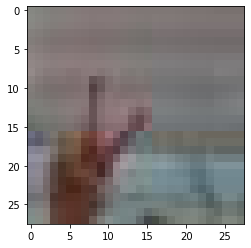

In [66]:
import matplotlib as plt
plt.pyplot.imshow(x_train[0])
print('라벨:', y_train[0])

# 딥러닝 네트워크 설계하기

가위바위보를 인식하는 딥러닝 네트워크를 설계

In [67]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax')) # 가위 바위 보 총 3개

In [68]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 800)               0         
                                                                 
 dense_6 (Dense)             (None, 32)               

# 딥러닝 네트워크 학습시키기

In [69]:
x_train.shape

(300, 28, 28, 3)

In [70]:
# 가위바위보니깐 3을 주는게 맞다

x_train_reshaped=x_train_norm.reshape(-1, 28, 28, 3) 
print(x_train_reshaped.shape)

(300, 28, 28, 3)


In [71]:
# 모델 힉습

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
10/10 [==============================] - 1s 27ms/step - loss: 0.9461 - accuracy: 0.7167
Epoch 2/10
10/10 [==============================] - 0s 29ms/step - loss: 0.7673 - accuracy: 0.7400
Epoch 3/10
10/10 [==============================] - 0s 26ms/step - loss: 0.6636 - accuracy: 0.7100
Epoch 4/10
10/10 [==============================] - 0s 29ms/step - loss: 0.5308 - accuracy: 0.7400
Epoch 5/10
10/10 [==============================] - 0s 26ms/step - loss: 0.4842 - accuracy: 0.7267
Epoch 6/10
10/10 [==============================] - 0s 29ms/step - loss: 0.4262 - accuracy: 0.7267
Epoch 7/10
10/10 [==============================] - 0s 27ms/step - loss: 0.3505 - accuracy: 0.8467
Epoch 8/10
10/10 [==============================] - 0s 28ms/step - loss: 0.3051 - accuracy: 0.9033
Epoch 9/10
10/10 [==============================] - 0s 27ms/step - loss: 0.2826 - accuracy: 0.8867
Epoch 10/10
10/10 [==============================] - 0s 27ms/step - loss: 0.2634 - accuracy: 0.9000


In [72]:
# 모델 훈련하기

test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 5.7802 - accuracy: 0.3333 - 238ms/epoch - 24ms/step
test_loss: 5.780239105224609 
test_accuracy: 0.3333333432674408


# 얼마나 잘 만들었는 지 확인하기(테스트)


In [73]:
# 주먹과 보자기 이미지 28x28로 만들기

image_dir_scissor_path = "/content/drive/MyDrive/data/test/scissor"
image_dir_rock_path = "/content/drive/MyDrive/data/test/rock"
image_dir_paper_path = "/content/drive/MyDrive/data/test/paper"
resize_images(image_dir_scissor_path)
resize_images(image_dir_rock_path)
resize_images(image_dir_paper_path)

100  images to be resized.
100  images resized
100  images to be resized.
100  images resized
100  images to be resized.
100  images resized


In [74]:
images_dir_path = "/content/drive/MyDrive/data/test"
(x_test, y_test) = load_data(images_dir_path)
x_test_norm = x_test/255.0

학습데이터(x_train)의 이미지 개수는 300 입니다.


In [75]:
x_test_reshaped=x_test_norm.reshape(-1, 28, 28, 3)
print(x_test_reshaped.shape)

(300, 28, 28, 3)


In [76]:
# 모델 학습하기

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_test_reshaped, y_test, epochs=10)

Epoch 1/10
10/10 [==============================] - 1s 28ms/step - loss: 3.2262 - accuracy: 0.3867
Epoch 2/10
10/10 [==============================] - 0s 27ms/step - loss: 1.2571 - accuracy: 0.3333
Epoch 3/10
10/10 [==============================] - 0s 28ms/step - loss: 1.0879 - accuracy: 0.3767
Epoch 4/10
10/10 [==============================] - 0s 27ms/step - loss: 1.0868 - accuracy: 0.3833
Epoch 5/10
10/10 [==============================] - 0s 29ms/step - loss: 1.0776 - accuracy: 0.4367
Epoch 6/10
10/10 [==============================] - 0s 31ms/step - loss: 1.0693 - accuracy: 0.6433
Epoch 7/10
10/10 [==============================] - 0s 28ms/step - loss: 1.0517 - accuracy: 0.6567
Epoch 8/10
10/10 [==============================] - 0s 26ms/step - loss: 1.0252 - accuracy: 0.5233
Epoch 9/10
10/10 [==============================] - 0s 28ms/step - loss: 0.9910 - accuracy: 0.5467
Epoch 10/10
10/10 [==============================] - 0s 27ms/step - loss: 0.9433 - accuracy: 0.8000


In [77]:
# 모델 훈련하기

test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 0.9081 - accuracy: 0.8033 - 239ms/epoch - 24ms/step
test_loss: 0.9081459641456604 
test_accuracy: 0.8033333420753479


# 회고

딥러닝이 처음이라 신기했습니다. 전에는 무수히 train과 test를 구분하여 머신러닝을 돌렸었습니다. 
하지만, 오늘은 model이 혼자 스스로 학습했습니다. 성능이 좋아진 기능이 혼자 저장된다는 것이 너무 신기했습니다. 
accuracy도 원했던 값 가까이 나와서 좋았습니다. 딥러닝의 첫발을 아주 기분 좋게 내딛어서 행복합니다.